# Programming Task : Linear Separator
### Carlos Miguel Vergel Infante - October 9th, 2019

In the problem, there are two groups of 2-dimensional (x,y) coordinates labeled as `group1` and `group2`, which are defined as:

In [1]:
group1 = [[0.067, 0.21], [0.092, 0.21], 
  [0.294, 0.445], [0.227, 0.521], [0.185, 0.597], 
  [0.185, 0.689], [0.235, 0.748], [0.319, 0.773], 
  [0.387, 0.739], [0.437, 0.672], [0.496, 0.739],
  [0.571, 0.773], [0.639, 0.765], [0.765, 0.924],
  [0.807, 0.933], [0.849, 0.941]]

In [2]:
group2 = [[0.118, 0.143], [0.118, 0.176], 
  [0.345, 0.378], [0.395, 0.319], [0.437, 0.261],
  [0.496, 0.328], [0.546, 0.395], [0.605, 0.462],
  [0.655, 0.529], [0.697, 0.597], [0.706, 0.664],
  [0.681, 0.723], [0.849, 0.798], [0.857, 0.849],
  [0.866, 0.899]]

Each list has a different number of entries as it was checked here:

In [3]:
print('Number of Entries in group1',len(group1))
print('Number of Entries in group2',len(group2))

Number of Entries in group1 16
Number of Entries in group2 15


The task in this notebook is to find an equation for a linear separation for these two groups of points. But before getting into the code, let's first see how the plots are distributed in the (x,y)-plane. For this, let's first stablish our environment with the usual libraries including `scikit-learn` to be used laster in the notebook.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

Now, we can plot the two lists and see that together they formed a heart with some extra points looking as an arrow. In fact, the linear separator we are looking for in this task is the missing part of the arrow that will complete the figure.

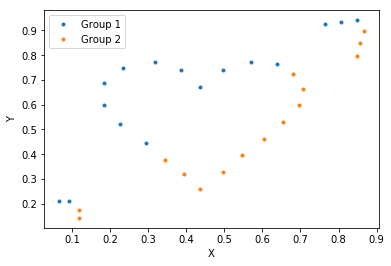

In [5]:
x_group1 = [x[0] for x in group1]
y_group1 = [x[1] for x in group1]

x_group2 = [x[0] for x in group2]
y_group2 = [x[1] for x in group2]

plt.plot(x_group1, y_group1,'.', label='Group 1')
plt.plot(x_group2, y_group2,'.', label='Group 2')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

Now that we have seen the data and visualy understood the perfect outcome of the task, let's finally tackle the problem. The best method to solve this task is `Support Vector Machine` (`SVM`), a Machine Learning technique that can be used to separate groups of points in 2 or more dimentions. However, given our problem, we are only going to focus on the `linear` version of the method.

Before getting into the proper method, let's create a new list containing both groups:

In [6]:
# Cloning the group1 list, and appending every term of group2 into the new list: final_list

final_list = group1.copy()

for x in range(0, len(group2)):
    final_list.append(group2[x])

In [7]:
# Double-checking that final_list behaves as expected

final_list

[[0.067, 0.21],
 [0.092, 0.21],
 [0.294, 0.445],
 [0.227, 0.521],
 [0.185, 0.597],
 [0.185, 0.689],
 [0.235, 0.748],
 [0.319, 0.773],
 [0.387, 0.739],
 [0.437, 0.672],
 [0.496, 0.739],
 [0.571, 0.773],
 [0.639, 0.765],
 [0.765, 0.924],
 [0.807, 0.933],
 [0.849, 0.941],
 [0.118, 0.143],
 [0.118, 0.176],
 [0.345, 0.378],
 [0.395, 0.319],
 [0.437, 0.261],
 [0.496, 0.328],
 [0.546, 0.395],
 [0.605, 0.462],
 [0.655, 0.529],
 [0.697, 0.597],
 [0.706, 0.664],
 [0.681, 0.723],
 [0.849, 0.798],
 [0.857, 0.849],
 [0.866, 0.899]]

As a double-check, we can print the length of `final_list` since we know already that it needs to be 16 (group1) + 15 (group2) = 31, as calculated before.

In [8]:
len(final_list)

31

Perfect! 

Since `SVM` is a surpervised learning technique, we are required to specify to which group each point corresponds. Since we know the first 16 elements correspond to the `group1` and the rest to the `group2`, we can create the list `y_label` where elements from the `group1` are labeled as 0 and 1 if they are from the `group2`:

In [9]:
y_label = []
for x in range (0,len(final_list)):
    if x < len(group1):
        y_label.append(0)
    else:
        y_label.append(1)

And again, let's print the list and check its lenght (should be 31 again) to be sure before continuing.

In [10]:
y_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [11]:
len(y_label)

31

Alright. Time for the interesting machine learning stuff. We know we need to create a `Linear SVM` to find our linear separation so we are going to create one directly from the `scikit-learn` package as:

In [12]:
# Create a linear SVM classifier 
clf = svm.SVC(kernel='linear', C=1E10)

Now, there is an extra requirement here of `C=1E10`. The `C` parameter is called the `tunning parameter` and can be understood as how flexible (low values of `C`) or strict (high values of `C`) the spatial separation between the two groups would be. As in our case both groups are well separated, we should increase the value of `C` to make sure the output of the method corresctly classifies all the points in the data. With this in main, let's fit the classifier (`clf`) with our data list (`final_list`) and the corresponding labels (`y_label`).

In [13]:
# Train classifier 
clf.fit(final_list, y_label)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Before going any further, we should check if all the points were correctly classified or not. To this, we can use a quick trick. We used the fit of the classifier (`clf`) to predict the values of the `final_list` and there compare the prediction with the `y_label`. We are looking for an accuracy of 100% if all the points were correctly classified into their correspoinding group.

In [14]:
clf_predictions = clf.predict(final_list)
print("Accuracy: {}%".format(clf.score(final_list, y_label) * 100 ))

Accuracy: 100.0%


Great, we have achieved our goal!

Now, we can focus on getting the proper equation and then plot it to see if it corresponds to what we thought before. We can obtained the coefficients and intercept points as:

In [15]:
print('Coeffcients X and Y = ', clf.coef_)
print('Intercept = ', clf.intercept_)

Coeffcients X and Y =  [[ 34.61834698 -35.84836888]]
Intercept =  [3.34295641]


The coefficients are given in the from `a*x + b*y + intercept = 0`. Therefore, to find our separating line we need to solve this equation for `y` as:

`y = -(a/b)*x - (int/b) = (34.61834698/35.84836888)*x + (3.34295641/35.84836888)`

Then, our final equation is:

`y = 0.96568820455*x + 0.09325267827`.

We can better visualize this equation by plotting it along with the other two groups of points as:

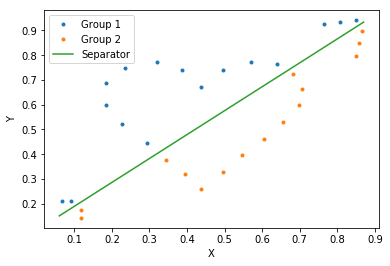

In [16]:
x_group1 = [x[0] for x in group1]
y_group1 = [x[1] for x in group1]

x_group2 = [x[0] for x in group2]
y_group2 = [x[1] for x in group2]

linear_separator = np.arange(0.06, 0.88, 0.01)

plt.plot(x_group1, y_group1,'.', label='Group 1')
plt.plot(x_group2, y_group2,'.', label='Group 2')
plt.plot(linear_separator, ((34.61834698/35.84836888)*linear_separator) + (clf.intercept_/35.84836888), label='Separator')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.show()

Then, the full image of the heart and the arrow is finally completed!